In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
from datetime import timedelta

In [3]:
import pandas                   as     pd
import numpy                    as     np
import seaborn                  as     sns
import matplotlib.pyplot        as     plt
import statsmodels.api          as     sm
from   sklearn.preprocessing    import OrdinalEncoder
from   sklearn                  import metrics
from   sklearn                  import tree
import sys, os

In [4]:
os.chdir(r'D:\DrPKV\20220519')
file_name   = './Output/Bankruptcy-data-2022_06_17_13_49_02.csv'

In [5]:
def split_target_predictor(dataframe, target_name): 

    import pandas as pd
    
    df                 = pd.DataFrame(dataframe)
    predictor_names    = list(df.columns)
    array              = df.values 
    
    #target_name        = input('Target variable name: ')
    
    predictor_names.remove(target_name)
   
    idx                = [df.columns.get_loc(c) for c in df.columns if c in predictor_names]
    X                  = array[:,idx] 

    
    idy                =  df.columns.get_loc(target_name)
    Y                  = array[:,idy] 
    return X, Y

### --------------------------------------------------------------------------------------------


In [6]:
"""
   Function Name: split_train_test

   Description: This function splits the data into training data and test data in the specified 
                proportion.
   
   Input: 1) Array for Predictor variables 
          2) Array for Target variable
          3) Test data proportion
          4) Seed for random number used in split
    
    
   Output: 1) Array of Training data for predictor variables
           2) Array of Training data for target variable
           3) Array of Testing  data for predictor variables
           4) Array of Testing  data for target variable
          
   
"""

def split_train_test(df1, target_var, test_size = 0.3, seed = 123): 

    from   sklearn.model_selection  import  train_test_split
    
    Y                                =  df1.pop(target_var)
    X                                =  df1
    
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = test_size, random_state = seed) 

    return X_train, X_test, Y_train, Y_test

### --------------------------------------------------------------------------------------------

In [7]:
"""
Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(n_splits, random_state, X_train, Y_train):  

    ### To compare algorithms
    
    from    matplotlib import pyplot
    from    sklearn.model_selection    import   KFold
    from    sklearn.model_selection    import   cross_val_score
    from    sklearn.linear_model       import   LogisticRegression
    from    sklearn.tree               import   DecisionTreeClassifier
    from    sklearn.neighbors          import   KNeighborsClassifier
    from    sklearn.naive_bayes        import   GaussianNB
    from    sklearn.ensemble           import   RandomForestClassifier
    
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF',RandomForestClassifier()))
    
    
    ### Evaluate model in turn
   
    scores_req =  ['roc_auc', 'precision', 'recall']
    
    for i in range(len(scores_req)):
        results    =  []
        scoring    = scores_req[i]
        names      =  []
        print(scoring)
        
        for name, model in models:
                print("\n n_splits %d" % (n_splits))        	
                kfold      =  KFold(n_splits)                

                cv_results =   cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
                results.append(cv_results)
                names.append(name)
                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = pyplot.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        pyplot.boxplot(results)
        ax.set_xticklabels(names)
        pyplot.show()

### ------------------------------------------------------------------------------------------


In [8]:
df1           =   pd.read_csv(file_name)
df1.columns   =   ['Row', 'Year', 'Year Encoded', 'Target','Asset_turnover', 'Receivable_turnover(new)',\
                   'Inventory_turnover','Cash_ratio', 'Quick_ratio', 'Current_ratio', 'ROA(new)', 'ROE(new)',\
                   'ROS(new)', 'debt_asset', 'debt_equity', 'debt_income','Interest_coverage', 'Asset_coverage',\
                   'EBIT_Sales', 'Sales_CE','ROCE_CE', 'Changeinsales_Industry', 'Grossvaluedadded', 'Ln_GVA',\
                   'Operating Cash Flow/Total Sales', 'Operating Cash Flow/Total Debt',\
                   'Operating Cash Flow/Shareholder"s Equity','Fixed Asset Turnover Ratio', 'YOY Sales Growth Rate',\
                   'YOY EBIT Growth Rate', 'Total shareholders" funds', 'Company_name']
print(df1.columns)

Index(['Row', 'Year', 'Year Encoded', 'Target', 'Asset_turnover',
       'Receivable_turnover(new)', 'Inventory_turnover', 'Cash_ratio',
       'Quick_ratio', 'Current_ratio', 'ROA(new)', 'ROE(new)', 'ROS(new)',
       'debt_asset', 'debt_equity', 'debt_income', 'Interest_coverage',
       'Asset_coverage', 'EBIT_Sales', 'Sales_CE', 'ROCE_CE',
       'Changeinsales_Industry', 'Grossvaluedadded', 'Ln_GVA',
       'Operating Cash Flow/Total Sales', 'Operating Cash Flow/Total Debt',
       'Operating Cash Flow/Shareholder"s Equity',
       'Fixed Asset Turnover Ratio', 'YOY Sales Growth Rate',
       'YOY EBIT Growth Rate', 'Total shareholders" funds', 'Company_name'],
      dtype='object')


In [9]:
###
X_train, X_test, Y_train, Y_test = split_train_test(df1, 'Target', 0.3, 12345)

print("Shape of X_train {}". format(X_train.shape))
print("Shape of X_test {}". format(X_test.shape))
print("Shape of Y_train {}". format(Y_train.shape))
print("Shape of Y_test {}". format(Y_test.shape))

Shape of X_train (6300, 31)
Shape of X_test (2700, 31)
Shape of Y_train (6300,)
Shape of Y_test (2700,)


roc_auc

 n_splits 10
LR: 0.595213 (0.018442)

 n_splits 10
KNN: 0.656709 (0.038811)

 n_splits 10
CART: 1.000000 (0.000000)

 n_splits 10
NB: 0.561934 (0.027011)

 n_splits 10
RF: 1.000000 (0.000000)


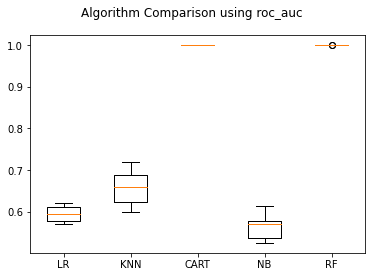

precision

 n_splits 10
LR: 0.857501 (0.010378)

 n_splits 10
KNN: 0.879723 (0.011246)

 n_splits 10
CART: 1.000000 (0.000000)

 n_splits 10
NB: 0.965549 (0.031073)

 n_splits 10
RF: 1.000000 (0.000000)


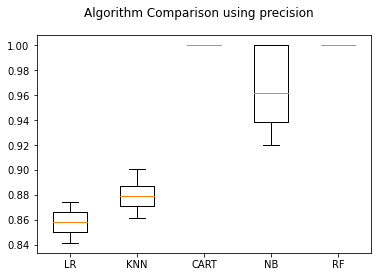

recall

 n_splits 10
LR: 0.996655 (0.002183)

 n_splits 10
KNN: 0.968149 (0.008714)

 n_splits 10
CART: 1.000000 (0.000000)

 n_splits 10
NB: 0.040070 (0.008015)

 n_splits 10
RF: 1.000000 (0.000000)


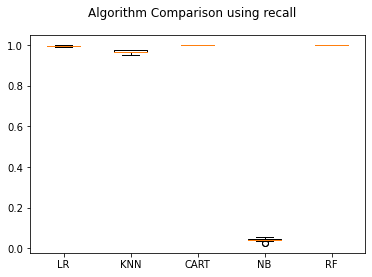

In [10]:
n_splits     = 10
random_state = 123456

compare_models(n_splits, random_state, X_train, Y_train)